Importing Dependencies

In [8]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

Loading and preprocessing the IMDb dataset

In [9]:
# Load IMDb dataset
dataset, info = tfds.load("imdb_reviews", as_supervised=True, with_info=True)
train_data, test_data = dataset['train'], dataset['test']

In [10]:
# Extract text samples for vectorization
train_text = train_data.map(lambda x, y: x)

In [11]:
# Text preprocessing: Tokenization and padding
vectorizer = tf.keras.layers.TextVectorization(max_tokens=10000, output_sequence_length=256)
vectorizer.adapt(train_text)

Building the feedforward neural network

In [12]:
# Define the model architecture (includes vectorization layer)
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,), dtype=tf.string),  # Accepts raw text input
    vectorizer,  # Text preprocessing inside the model
    tf.keras.layers.Embedding(input_dim=10000, output_dim=50),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [13]:
# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [14]:
# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization_2            │ (None, 256)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 256, 50)        │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 50)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         6,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 514,849 (1.96 MB)

 Trainable params: 514,849 (1.96 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Train the model
history = model.fit(train_data.batch(32), epochs=10, validation_data=test_data.batch(32))


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.6370 - loss: 0.5982 - val_accuracy: 0.8598 - val_loss: 0.3273
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.8686 - loss: 0.3200 - val_accuracy: 0.8416 - val_loss: 0.3670
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.8919 - loss: 0.2734 - val_accuracy: 0.7652 - val_loss: 0.6246
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9082 - loss: 0.2431 - val_accuracy: 0.8141 - val_loss: 0.4904
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9220 - loss: 0.2107 - val_accuracy: 0.8398 - val_loss: 0.4433
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9323 - loss: 0.1962 - val_accuracy: 0.8168 - val_loss: 0.5683
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9388 - loss: 0.1759 - val_accuracy: 0.8458 - val_loss: 0.4615
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.9448 - loss: 0.1603 - 

In [16]:
# Save the model (with preprocessing included)
model.save("sentiment_analysis_model.keras")

In [20]:
# Model Evaluation
y_true = np.array([label.numpy() for _, label in test_data])
y_pred = (model.predict(test_data.batch(32)) > 0.5).astype("int32").flatten()


782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step


In [21]:
# Print classification report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83     12500
           1       0.82      0.88      0.85     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



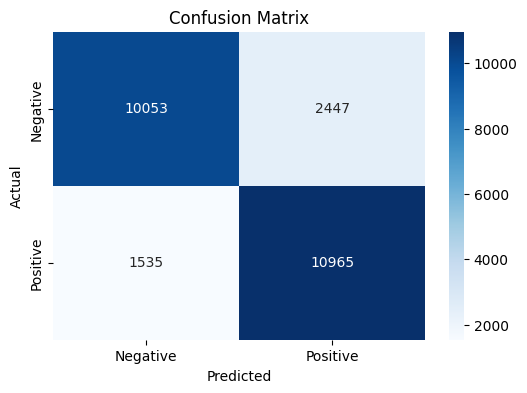

In [22]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()